# ODSC Notes

- PCA / Manifold Learning
- Grid Searching
- Pipelines
- Imbalanced Data
- Importance of Visualization
- Recipes
- Bayesian A/B
- Deep Learning
- LIME

In [1]:
%matplotlib notebook

In [2]:
%load_ext rpy2.ipython

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import pymc3 as pm

## PCA / Manifold Learning

In [4]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
np.set_printoptions(suppress=True)

digits = load_digits()
X, y = digits.data, digits.target

<IPython.core.display.Javascript object>


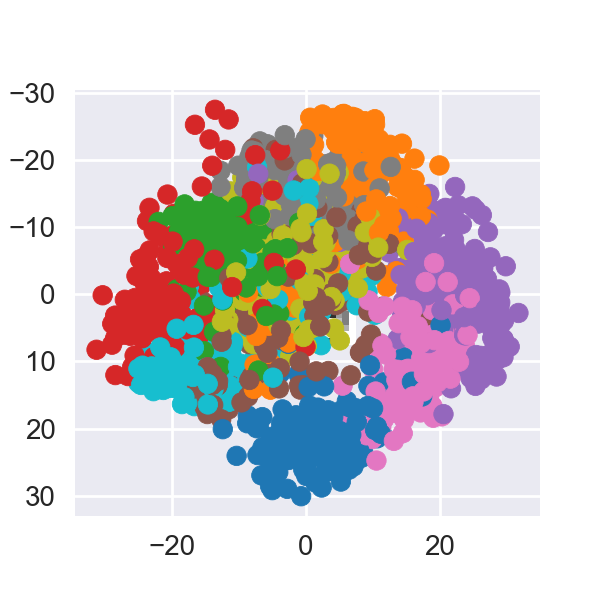

In [7]:
plt.figure(1, figsize=(3, 3))
# 102 - 5
# 1406 - 9
# 500 - 8
plt.imshow(digits.images[1406], cmap=plt.cm.gray_r, interpolation='nearest')

0) Import the model

In [8]:
from sklearn.decomposition import PCA

1) Instantiate the model 

In [9]:
pca = PCA(n_components = 2)
# just give me "two columns" if you want to think of it that way
# two so that we can plot it

2) Fit to training data

In [10]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

3) Transform to a lower-dimensional representation

In [11]:
print(X.shape)
X_pca = pca.transform(X)
X_pca.shape

(1797, 64)


(1797, 2)

4) Visualize

<IPython.core.display.Javascript object>


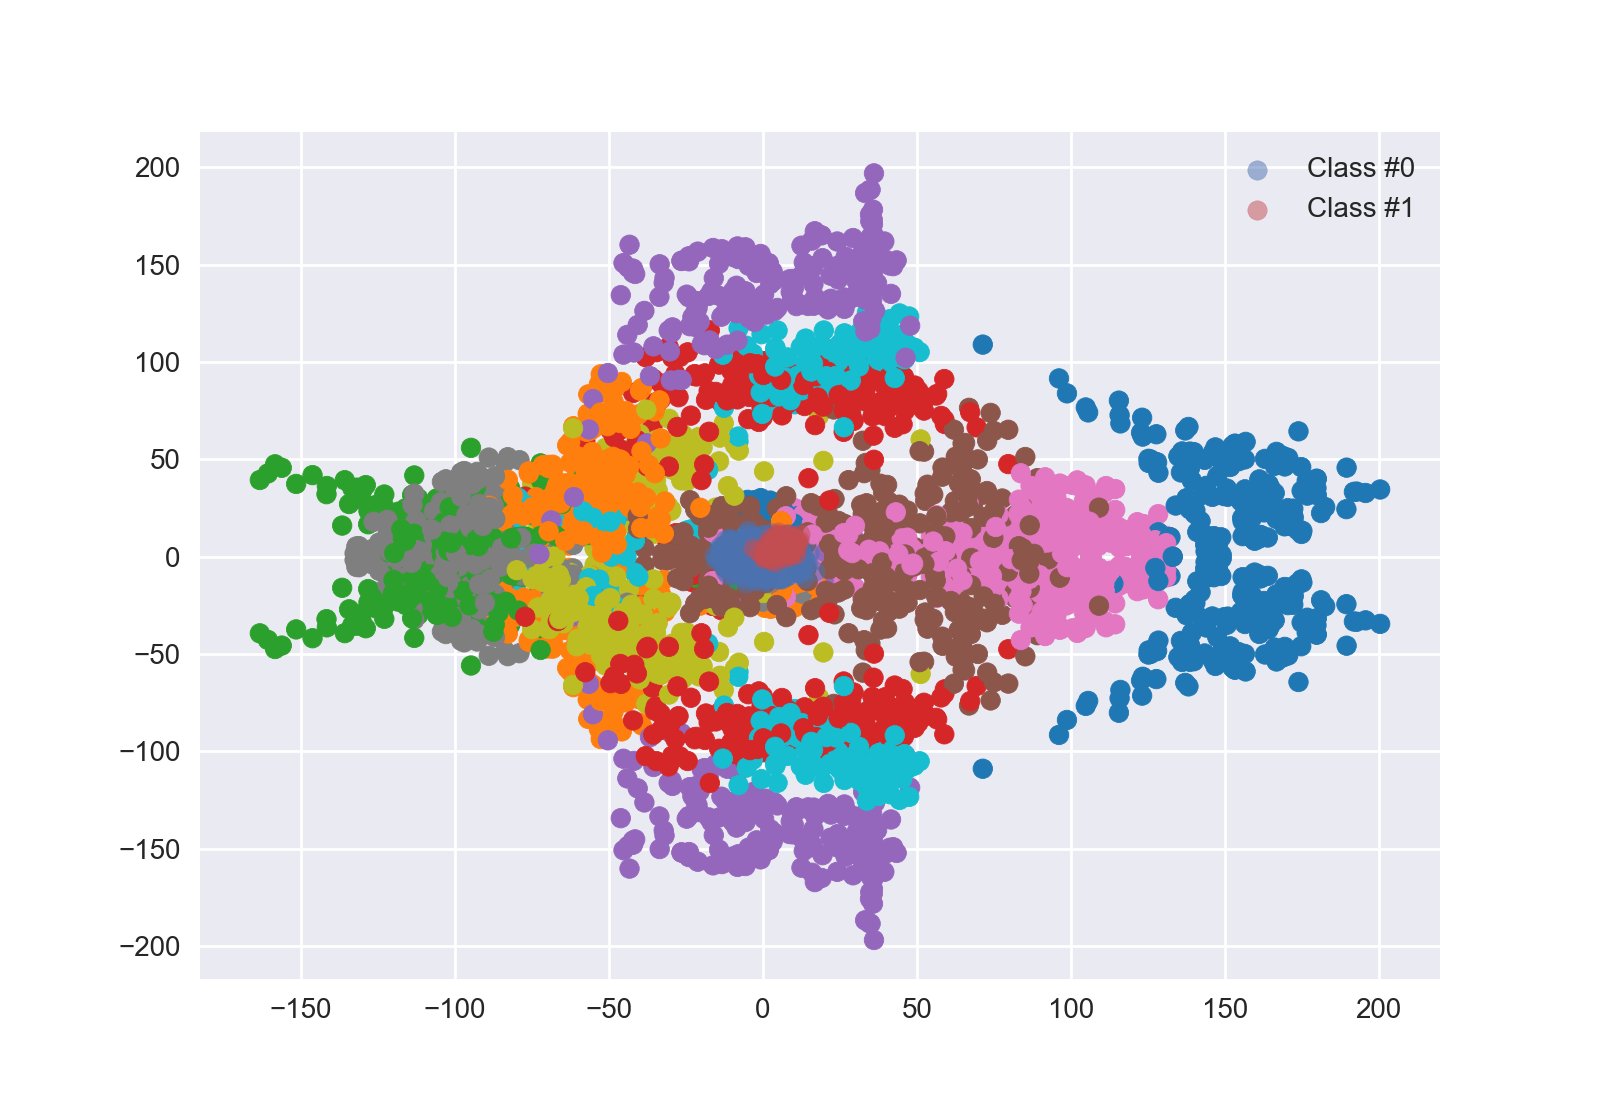

In [13]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=plt.cm.Vega10(y))

In [14]:
print(X_pca[:,0])
print(X_pca[:,1])
print(y)

pca_data = pd.DataFrame({
    'x1' : X_pca[:,0], 
    'x2' : X_pca[:,1], 
    'y' : y})

pca_data.head(10)

[ -1.25946673   7.95761107   6.99192336 ...,  10.80128376  -4.87210079
  -0.3443894 ]
[ 21.27488402 -20.76869798  -9.95598731 ...,  -6.96025232  12.42395632
   6.36554831]
[0 1 2 ..., 8 9 8]


x1         x2  y
0  -1.259467  21.274884  0
1   7.957611 -20.768698  1
2   6.991923  -9.955987  2
3 -15.906105   3.332464  3
4  23.306867   4.269062  4
5 -14.087086   7.914448  5
6  21.363409   5.288341  6
7  -2.952606 -21.071666  7
8  -5.255135   1.183362  8
9  -5.480199   8.076326  9

/Users/max/anaconda/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr

  warnings.warn(x, RRuntimeWarning)
/Users/max/anaconda/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Conflicts with tidy packages ---------------------------------------------------

  warnings.warn(x, RRuntimeWarning)
/Users/max/anaconda/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: filter(): dplyr, stats
lag():    dplyr, stats

  warnings.warn(x, RRuntimeWarning)


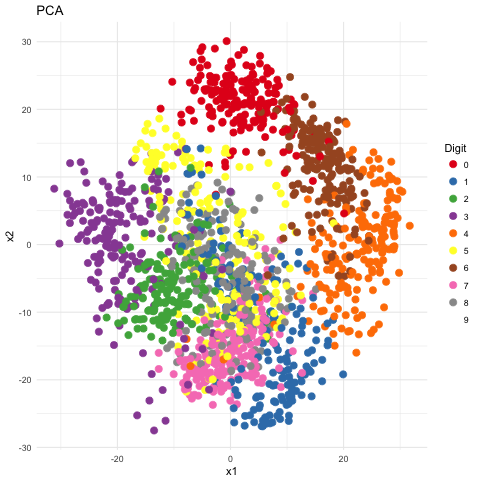

In [15]:
%%R -i pca_data

library(tidyverse)

pca_data %>%
    ggplot(aes(x = x1, y = x2, color = factor(y))) + 
    geom_point(size = 3) + 
    scale_colour_brewer(palette = "Set1") +
    labs(title = "PCA", color = "Digit") + 
    theme_minimal()

In [19]:
from sklearn.manifold import Isomap
isomap = Isomap() # can't be used for new data :(

X_isomap = isomap.fit_transform(X) # shortcut, but no fit 
plt.scatter(X_isomap[:, 0], X_isomap[:, 1], c=plt.cm.Vega10(y))

In [17]:
from sklearn.manifold import TSNE # t-distributed stochastic neighbor embedding

tsne = TSNE()
X_tsne = tsne.fit_transform(X)

tsne_data = pd.DataFrame({
    'x1' : X_tsne[:,0], 
    'x2' : X_tsne[:,1], 
    'y' : y})

tsne_data.head(10)

x1         x2  y
0   1.641208  16.908500  0
1  10.640937  -1.596895  1
2  -4.384988  -8.388077  2
3   2.223027   8.311237  3
4  12.165016   5.680845  4
5  -4.801629   6.091354  5
6  -4.523589 -13.288989  6
7 -16.090421  10.854124  7
8  -5.624169  -4.050887  8
9  -7.225095   1.594902  9

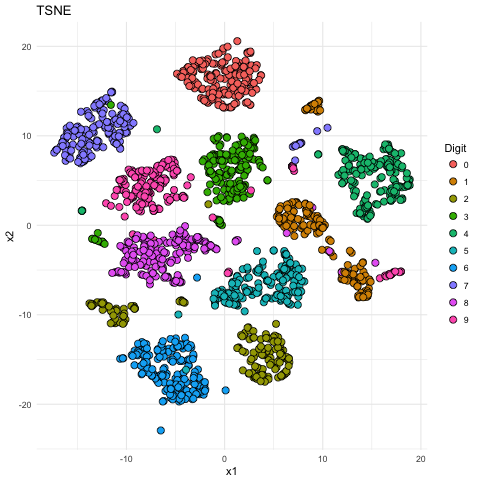

In [18]:
%%R -i tsne_data

library(tidyverse)

tsne_data %>%
    ggplot(aes(x = x1, y = x2, fill = factor(y))) + 
    geom_point(size = 3, shape = 21, color = "black") + 
    scale_colour_brewer(palette = "Set1") +
    labs(title = "TSNE", fill = "Digit") + 
    theme_minimal()

## Grid Search

In [20]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [22]:
svm = SVC()
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.36444444444444446

In [23]:
param_grid = {'C': 10.0 ** np.arange(-3, 3),
              'gamma': 10.0 ** np.arange(-5, 0)}

print(param_grid)

{'C': array([   0.001,    0.01 ,    0.1  ,    1.   ,   10.   ,  100.   ]), 'gamma': array([ 0.00001,  0.0001 ,  0.001  ,  0.01   ,  0.1    ])}


In [24]:
grid = GridSearchCV(SVC(), param_grid, verbose=3, cv=5)

In [25]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] C=0.001, gamma=1e-05 ............................................
[CV] ............. C=0.001, gamma=1e-05, score=0.106227, total=   0.2s
[CV] C=0.001, gamma=1e-05 ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ............. C=0.001, gamma=1e-05, score=0.107011, total=   0.2s
[CV] C=0.001, gamma=1e-05 ............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV] ............. C=0.001, gamma=1e-05, score=0.204461, total=   0.2s
[CV] C=0.001, gamma=1e-05 ............................................
[CV] ............. C=0.001, gamma=1e-05, score=0.104478, total=   0.2s
[CV] C=0.001, gamma=1e-05 ............................................
[CV] ............. C=0.001, gamma=1e-05, score=0.105263, total=   0.2s
[CV] C=0.001, gamma=0.0001 ...........................................
[CV] ............ C=0.001, gamma=0.0001, score=0.106227, total=   0.2s
[CV] C=0.001, gamma=0.0001 ...........................................
[CV] ............ C=0.001, gamma=0.0001, score=0.107011, total=   0.2s
[CV] C=0.001, gamma=0.0001 ...........................................
[CV] ............ C=0.001, gamma=0.0001, score=0.208178, total=   0.2s
[CV] C=0.001, gamma=0.0001 ...........................................
[CV] ............ C=0.001, gamma=0.0001, score=0.104478, total=   0.2s
[CV] C=0.001, gamma=0.0001 ...........................................
[CV] .

[CV] ............... C=0.1, gamma=0.001, score=0.952381, total=   0.1s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ............... C=0.1, gamma=0.001, score=0.959410, total=   0.1s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ............... C=0.1, gamma=0.001, score=0.955390, total=   0.1s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ............... C=0.1, gamma=0.001, score=0.977612, total=   0.1s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ............... C=0.1, gamma=0.001, score=0.962406, total=   0.1s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................ C=0.1, gamma=0.01, score=0.106227, total=   0.2s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................ C=0.1, gamma=0.01, score=0.107011, total=   0.2s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] .

[CV] ............... C=10.0, gamma=0.01, score=0.768657, total=   0.2s
[CV] C=10.0, gamma=0.01 ..............................................
[CV] ............... C=10.0, gamma=0.01, score=0.781955, total=   0.2s
[CV] C=10.0, gamma=0.1 ...............................................
[CV] ................ C=10.0, gamma=0.1, score=0.106227, total=   0.3s
[CV] C=10.0, gamma=0.1 ...............................................
[CV] ................ C=10.0, gamma=0.1, score=0.107011, total=   0.3s
[CV] C=10.0, gamma=0.1 ...............................................
[CV] ................ C=10.0, gamma=0.1, score=0.107807, total=   0.3s
[CV] C=10.0, gamma=0.1 ...............................................
[CV] ................ C=10.0, gamma=0.1, score=0.104478, total=   0.3s
[CV] C=10.0, gamma=0.1 ...............................................
[CV] ................ C=10.0, gamma=0.1, score=0.105263, total=   0.3s
[CV] C=100.0, gamma=1e-05 ............................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   37.8s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([   0.001,    0.01 ,    0.1  ,    1.   ,   10.   ,  100.   ]), 'gamma': array([ 0.00001,  0.0001 ,  0.001  ,  0.01   ,  0.1    ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=3)

In [26]:
grid.score(X_test, y_test)

0.99333333333333329

In [27]:
grid.best_params_ # everything learned has an underscore at the end

{'C': 10.0, 'gamma': 0.001}

In [28]:
grid.best_estimator_

SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [29]:
scores = grid.cv_results_['mean_test_score']
scores = np.array(scores).reshape(6, 5)

<IPython.core.display.Javascript object>


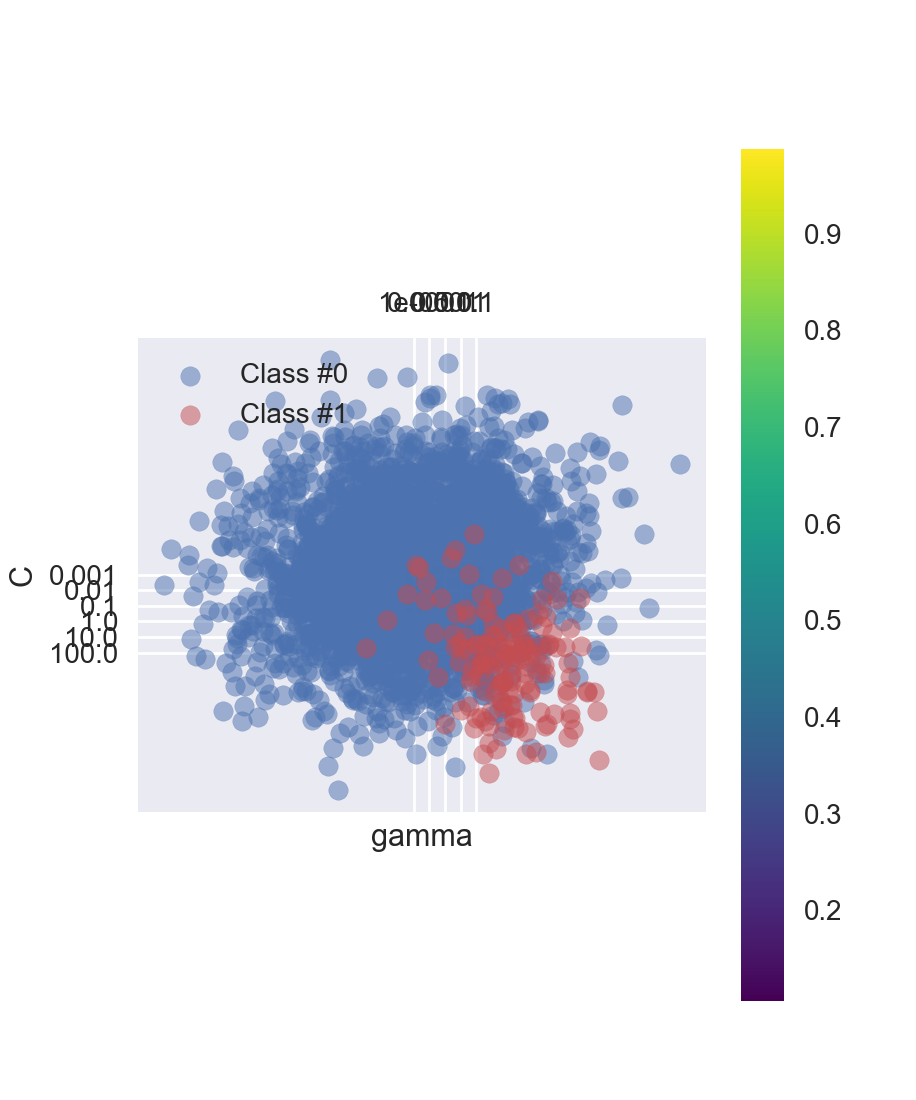

([<matplotlib.axis.YTick at 0x117c804e0>,
 <a list of 6 Text yticklabel objects>)

In [30]:
plt.matshow(scores, cmap=plt.cm.viridis)
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(5), param_grid['gamma'])
plt.yticks(np.arange(6), param_grid['C'])

## Pipelining

In [31]:
from pprint import pprint
from time import time
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [32]:
categories = [
    'rec.sport.hockey', 
    'sci.space'
]

newsgroup = fetch_20newsgroups(subset='train', categories=categories)
print("%d documents" % len(newsgroup.filenames))
print("%d categories" % len(newsgroup.target_names))

1193 documents
2 categories


In [33]:
print( newsgroup.target_names )

['rec.sport.hockey', 'sci.space']


In [34]:
print("----------\n")
print("> Target Label:",newsgroup.target[1],"\n" ) 
print( newsgroup.data[1] ) 

----------

> Target Label: 0 

From: umfu0009@ccu.umanitoba.ca (J. M. K. Fu)
Subject: Re: Tie Breaker....(Isles and Devils)
Nntp-Posting-Host: data.cc.umanitoba.ca
Organization: University of Manitoba, Winnipeg, Canada
Lines: 21

In <lrw509f@rpi.edu> wangr@vccsouth22.its.rpi.edu ( Rex Wang ) writes:

>	Are people here stupid or what??? It is a tie breaker, of cause they
>have to have the same record. How can people be sooooo stuppid to put win as
>first in the list for tie breaker??? If it is a tie breaker, how can there be
>different record???? Man, I thought people in this net are good with hockey.
>I might not be great in Math, but tell me how can two teams ahve the same points
>with different record??? Man...retard!!!!!! Can't believe people actually put
>win as first in a tie breaker......

Why not? I believe both the Devils and Islanders got 87 points.
Say for example, another team had this record : 20-37-47;
they had 20*2+47*1+37*0=87 which is the same as their points total.
(T

In [35]:
print("----------\n")
print("> Target Label:",newsgroup.target[2],"\n" ) 
print( newsgroup.data[2] ) 

----------

> Target Label: 1 

From: Mark.Prado@p2.f349.n109.z1.permanet.org (Mark Prado)
Subject: Sixty-two thousand (was Re: How many read sci.space?)
Lines: 32


Reply address: mark.prado@permanet.org

If anyone knows anyone else who would like to get sci.space,
but doesn't have an Internet feed (or has a cryptic Internet
feed), I would be willing to feed it to them.  I have a nice
offline message reader/editor, an automated modem "mailer"
program which will pick up mail bundles (quickly and easily),
and an INSTALL.EXE to set them up painlessly.  No charge for
the sci.space feed, though you have to dial Washington, D.C.
This is NOT a BBS -- it's a store & forward system for mail
bundles, with minimum connect times.  (I'm used to overseas
calls.)  (This is not an offer for a free feed for any other
particular newsgroups.)  Speeds of up to 14400 (v32bis) are
supported.  VIP's might be offered other free services, such
as Internet address and other functionality.

I get my feed from U

In [36]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(newsgroup.data)
X_train_counts.shape

(1193, 23580)

In [37]:
count_vect.vocabulary_.get('puck')

17502

In [38]:
count_vect.vocabulary_.get('jupiter')

12787

![](http://www.jiem.org/index.php/jiem/article/viewFile/293/252/2402)

In [39]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(1193, 23580)

In [40]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, newsgroup.target)

In [42]:
docs_new = [
    'He shoots, he scores!', 
    'That black hole is going to eat us.', 
    'Crosby has way more points than Ovi', 
    'Norm, your Rangers are going to lose.',
    "Rangers are staring at a black hole",
    'The milky way is suuuuuper milkly']

X_new_counts = count_vect.transform(docs_new)
X_new_tfidf = tfidf_transformer.transform(X_new_counts)

predicted = clf.predict(X_new_tfidf)

for doc, category in zip(docs_new, predicted):
    print('%r => %s' % (doc, newsgroup.target_names[category]))

'He shoots, he scores!' => rec.sport.hockey
'That black hole is going to eat us.' => sci.space
'Crosby has way more points than Ovi' => rec.sport.hockey
'Norm, your Rangers are going to lose.' => rec.sport.hockey
'Rangers are staring at a black hole' => rec.sport.hockey
'The milky way is suuuuuper milkly' => sci.space


In [ ]:
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier()),
])

parameters = {
    'vect__max_df': (0.5, 0.75, 1.0),
    'vect__ngram_range': ((1, 1), (1, 2)), # unigrams or bigrams
    'clf__alpha': (0.0001, 0.0000001),
    'clf__penalty': ('l2', 'elasticnet')
}

grid = GridSearchCV(pipeline, parameters ,n_jobs=-1, verbose=1)
print("Performing grid search...")
print("pipeline:", [name for name, _ in pipeline.steps])
print('parameters:')
pprint(parameters)
t0 = time()
grid.fit(newsgroup.data, newsgroup.target)
print("done in %0.3fs" % (time() - t0))
print()

In [ ]:
grid.best_score_

In [ ]:
grid.best_estimator_
# grid.best_estimator_.get_params()

## Imbalance

[SMOTE](https://www.jair.org/media/953/live-953-2037-jair.pdf)

In [45]:
import sklearn.datasets
from sklearn.decomposition import PCA

X, y = sklearn.datasets.make_classification(
    n_classes=2, 
    class_sep=2, weights=[0.05, 0.95],
    n_informative=20, 
    n_redundant=0, flip_y=0,
    n_features=50, 
    n_clusters_per_class=1,
    n_samples=3000, 
    random_state=42)

# invert the y to reflect the situation where '1' means good
y = 1 - y
 
def count_good(z): return sum(z)
def count_bad(z): return len(z) - sum(z)
def imbalance_ratio(z): return round(count_good(z)/count_bad(z),1)

num_good = count_good(y)
num_bad = count_bad(y)

print("Number of classified clients: %s" % num_good)
print("Number of unclassified clients: %s" % num_bad)
print("Imbalance ratio: %s" % imbalance_ratio(y))

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

def plotClassificationData(x, y, title=""):
    palette = sns.color_palette()
    plt.scatter(x[y == 0, 0], x[y == 0, 1], label="Class #0", alpha=0.5,
                facecolor=palette[0], linewidth=0.15)
    plt.scatter(x[y == 1, 0], x[y == 1, 1], label="Class #1", alpha=0.5,
                facecolor=palette[2], linewidth=0.15)
    plt.title(title)
    plt.legend()
    plt.show()

plotClassificationData(X_pca, y)

Number of classified clients: 150
Number of unclassified clients: 2850
Imbalance ratio: 0.1


In [44]:
X.shape

(3000, 50)

In [46]:
df = pd.DataFrame(X)
# pd.scatter_matrix(df, c=y, alpha=0.2)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

<IPython.core.display.Javascript object>


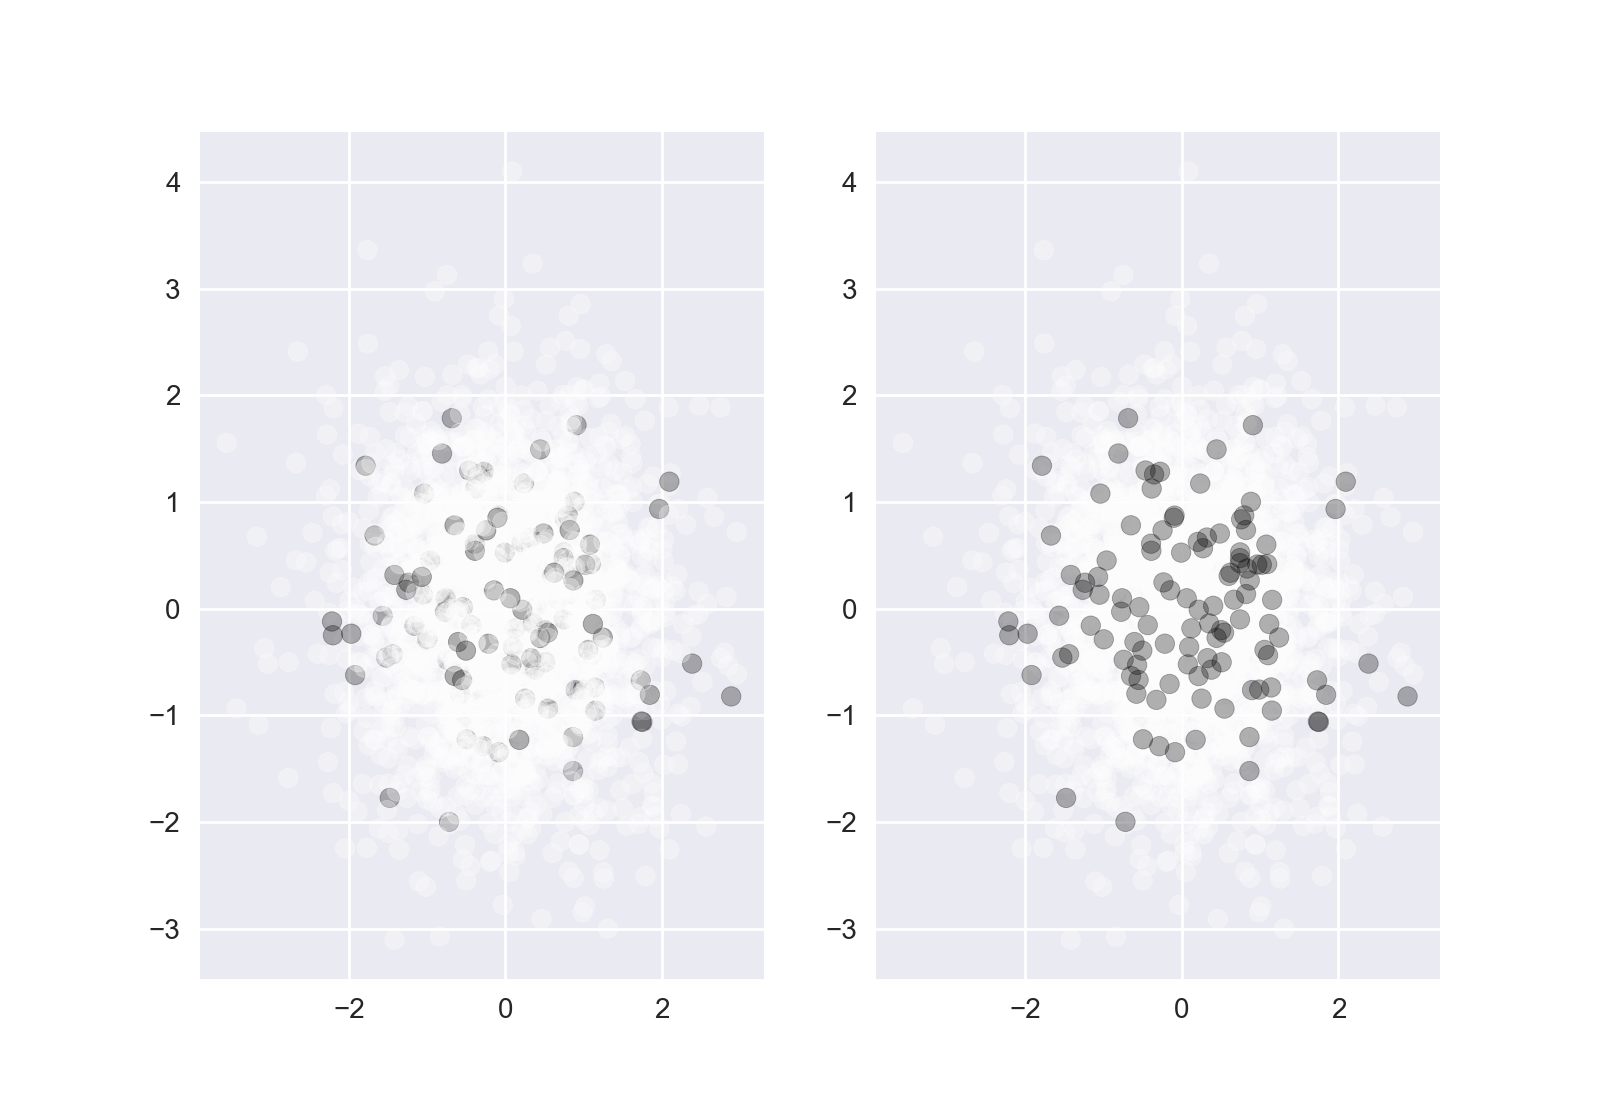

In [48]:
sorting = np.argsort(y_train)
fig, axes = plt.subplots(1, 2)
axes[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train[:], alpha=.3)
axes[1].scatter(X_train[sorting, 0], X_train[sorting, 1], c=y_train[sorting], alpha=.3)

In [49]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_sample(X_train, y_train)
print(X_train_smote.shape)
print(np.bincount(y_train_smote))

(4274, 50)
[2137 2137]


<IPython.core.display.Javascript object>


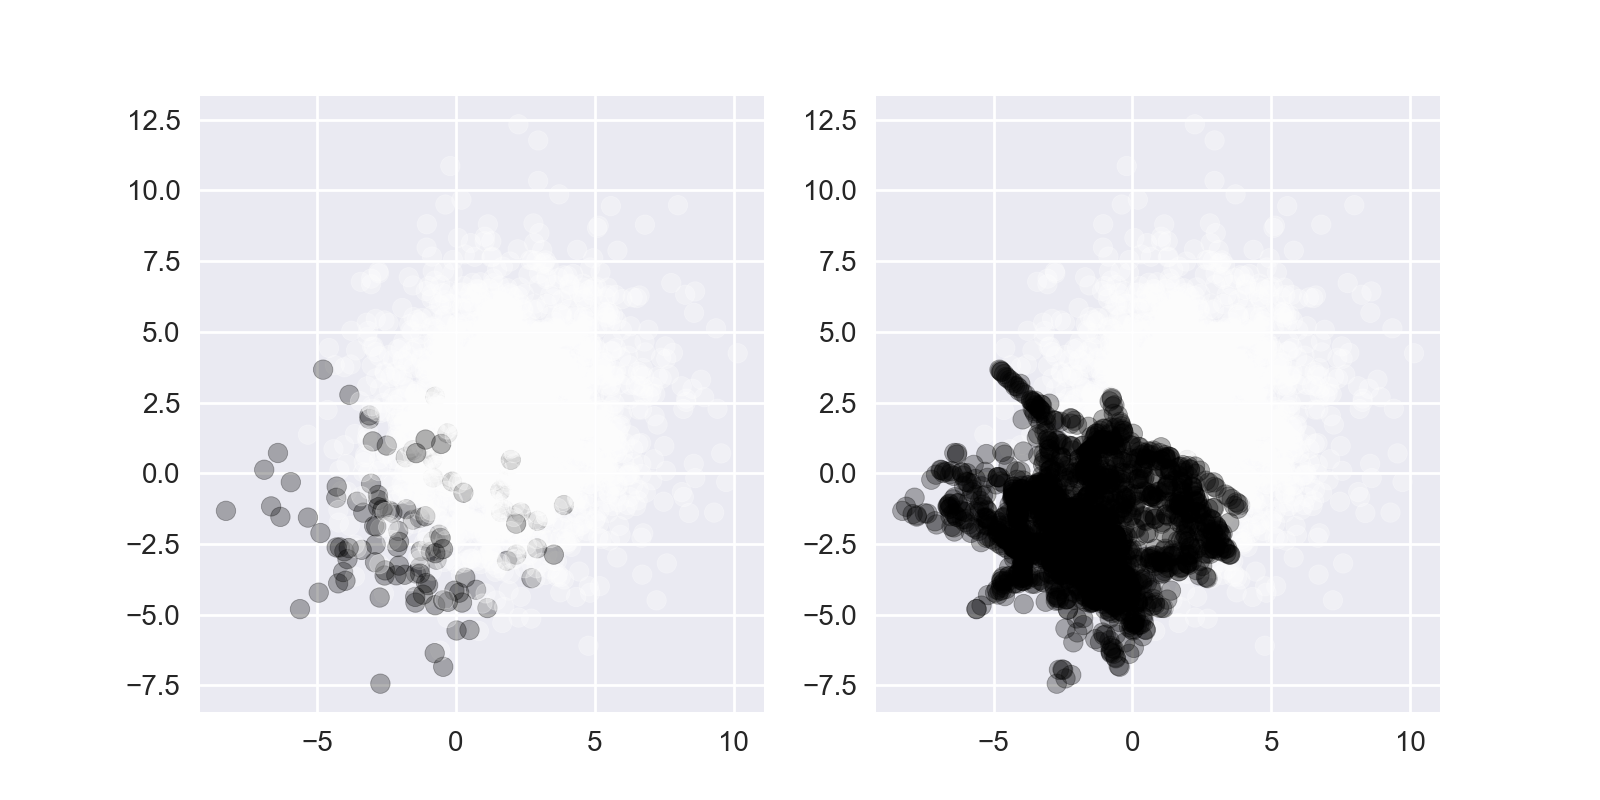

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
sorting = np.argsort(y_train)
axes[0].scatter(X_train[:, 3], X_train[:, 4], c=y_train, alpha=.3)
axes[1].scatter(X_train_smote[:, 3], X_train_smote[:, 4], c=y_train_smote, alpha=.3)

In [51]:
from imblearn.pipeline import make_pipeline as make_imb_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# SMOTE: Synthetic Minority Over-sampling Technique

smote_pipe = make_imb_pipeline(SMOTE(), LogisticRegression())
scores = cross_val_score(smote_pipe, X_train, y_train, cv=10, scoring='roc_auc')
scores
np.mean(scores)

1.0

## Importance of Visualization

/Users/max/anaconda/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Parsed with column specification:
cols(
  dataset = col_character(),
  x = col_double(),
  y = col_double()
)

  warnings.warn(x, RRuntimeWarning)


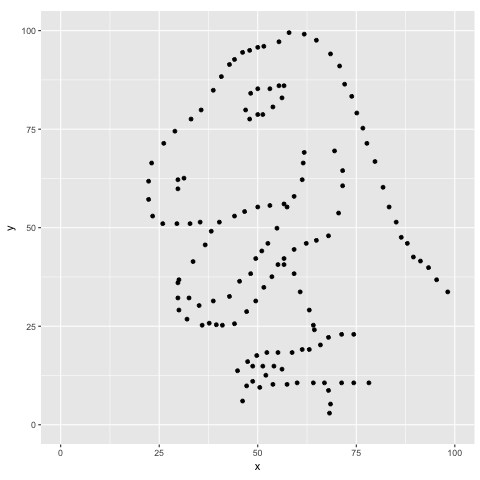

In [52]:
%%R 

library(tidyverse)
library(forcats)
library(gganimate)
library(tweenr)

dino <- read_tsv("_data/DatasaurusDozen.tsv") %>% 
    mutate(dataset = as_factor(dataset))

dino %>% 
    filter(dataset == "dino") %>% 
    ggplot(aes(x=x, y=y)) + 
    geom_point() + 
    coord_equal() + 
    xlim(0, 100) + 
    ylim(0, 100)

In [53]:
%%R

print( dino %>% distinct(dataset) )

# A tibble: 13 × 1
      dataset
       <fctr>
1        dino
2        away
3     h_lines
4     v_lines
5     x_shape
6        star
7  high_lines
8        dots
9      circle
10   bullseye
11   slant_up
12 slant_down
13 wide_lines


In [54]:
%%R 

dino %>% 
    group_by(dataset) %>% 
    summarise(
        x_mean = mean(x), 
        x_sd = sd(x), 
        y_mean = mean(y), 
        y_sd = sd(y), 
        cor = cor(x, y)) 

# A tibble: 13 × 6
      dataset   x_mean     x_sd   y_mean     y_sd         cor
       <fctr>    <dbl>    <dbl>    <dbl>    <dbl>       <dbl>
1        dino 54.26327 16.76514 47.83225 26.93540 -0.06447185
2        away 54.26610 16.76982 47.83472 26.93974 -0.06412835
3     h_lines 54.26144 16.76590 47.83025 26.93988 -0.06171484
4     v_lines 54.26993 16.76996 47.83699 26.93768 -0.06944557
5     x_shape 54.26015 16.76996 47.83972 26.93000 -0.06558334
6        star 54.26734 16.76896 47.83955 26.93027 -0.06296110
7  high_lines 54.26881 16.76670 47.83545 26.94000 -0.06850422
8        dots 54.26030 16.76774 47.83983 26.93019 -0.06034144
9      circle 54.26732 16.76001 47.83772 26.93004 -0.06834336
10   bullseye 54.26873 16.76924 47.83082 26.93573 -0.06858639
11   slant_up 54.26588 16.76885 47.83150 26.93861 -0.06860921
12 slant_down 54.26785 16.76676 47.83590 26.93610 -0.06897974
13 wide_lines 54.26692 16.77000 47.83160 26.93790 -0.06657523


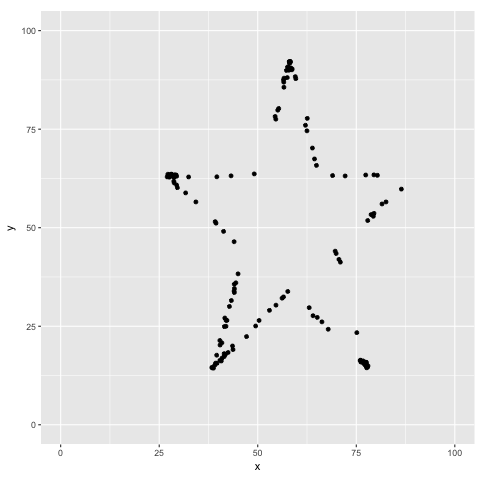

In [55]:
%%R 

dino %>% 
    filter(dataset == "star") %>% 
    ggplot(aes(x=x, y=y)) + 
    geom_point() + 
    coord_equal() + 
    xlim(0, 100) + 
    ylim(0, 100)

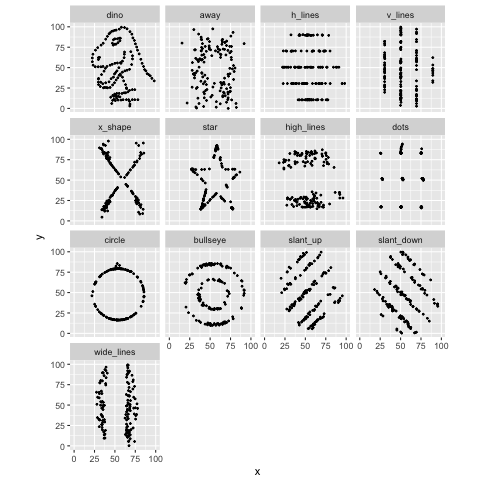

In [56]:
%%R 

dino %>% 
    ggplot(aes(x=x, y=y)) + 
    facet_wrap(~dataset) + 
    geom_point(size = 0.5) + 
    coord_equal() +
    xlim(0, 100) + 
    ylim(0, 100)

In [ ]:
# DON'T RUN
%%R 

n_dino <- dino %>%
    group_by(dataset) %>% 
    nest() %>% 
    add_row(dataset = "dino", data = list(.$data[[1]]))

tween_dino <- tween_states(
    data = n_dino$data, 
    tweenlength = 1, 
    statelength = 0.5, 
    ease = "sine-out", 
    nframe = 200) %>% 
    as.tibble()

p <- ggplot(tween_dino, aes(x=x, y=y)) + 
    geom_point(aes(frame=.frame), size=0.5) + 
    coord_equal()

animation::ani.options(interval = 1/15, ani.height=400, ani.width=400)
gganimate(p, title_frame=FALSE)

![](https://d2f99xq7vri1nk.cloudfront.net/DinoSequentialSmaller.gif)

## Creating and Preprocessing a Design Matrix with [Recipes](https://topepo.github.io/recipes/index.html)

![](_images/rec_1.png)

![](_images/rec_3.png)

![](_images/rec_4.png)

- **expected loss // amount could be a helper variable (not a predictor or outcome)**
- (`BradleyTerry2` modeling)

![](_images/rec_5.png)

![](_images/rec_6.png)

- *Recipes* separates the planning from the doing. 
- It is for specifications of intent
- Allows to assign 1-offs to "other" if below a certain threshold ('other' factor collapsing)
- Makes R the QB; modularization allows for farming-out computation to other languages

## Probabilistic Programming

Suppose option A sees 510 offers and 40 conversions, but option B sees 505 offers and 50 conversions.

In [57]:
import pymc3 as pm

with pm.Model() as ab_model:
    
    # A priori, no idea what the conversion rate for option A will be
    a_rate = pm.Uniform('a_rate')
    # Observed 40 conversions from 510 offers (option A)
    a_conversions = pm.Binomial('a_conversions', 510, a_rate, observed=40)
    
    # A priori, no idea what the conversion rate for option B will be
    b_rate = pm.Uniform('b_rate')
    # We observed 45 purchases from 505 visitors who saw variant A
    b_conversions = pm.Binomial('b_conversions', 505, b_rate, observed=45)
    
samples = 10000

with ab_model:
    step = pm.NUTS()
    ab_trace = pm.sample(samples, step, random_seed=42)

100%|██████████| 10000/10000 [00:05<00:00, 1672.62it/s]


<IPython.core.display.Javascript object>


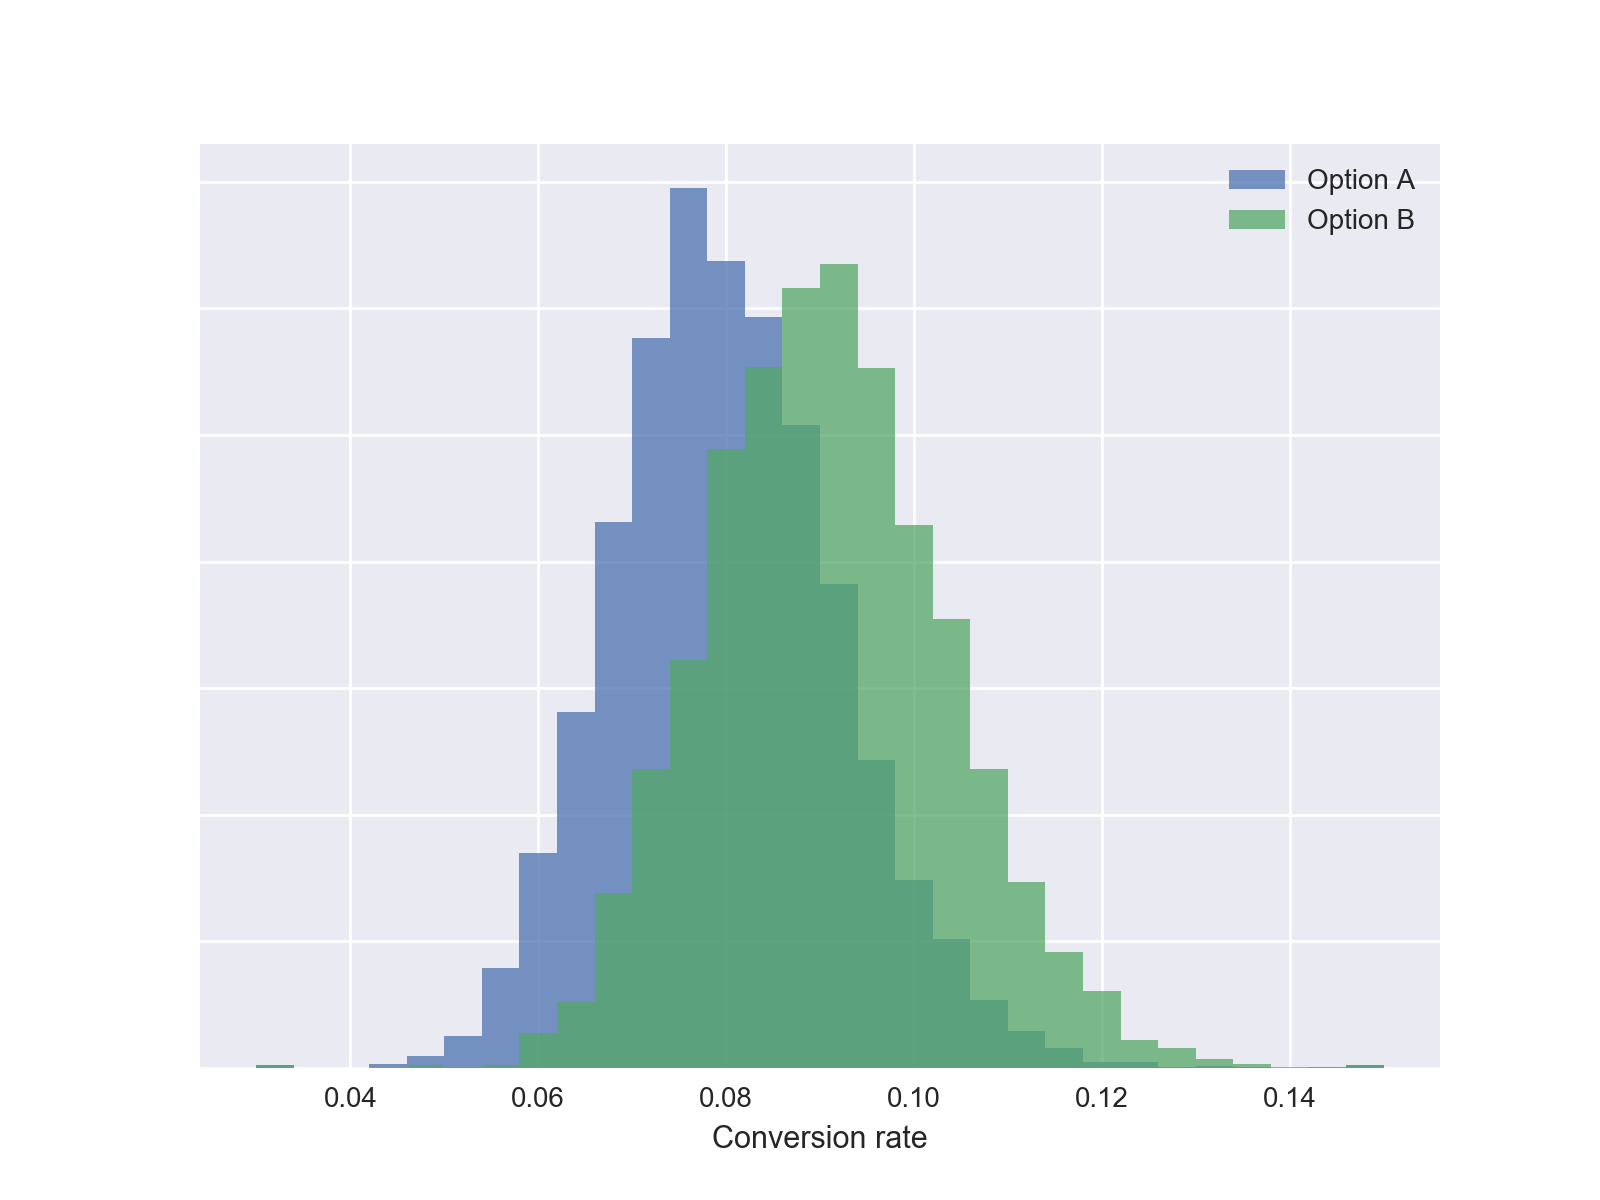

In [58]:
fig, ax = plt.subplots(figsize=(8, 6))

BINS = 30

ax.hist(np.clip(ab_trace['a_rate'], 0.03, 0.15),
        bins=BINS, normed=True, lw=0, alpha=0.75,
        label="Option A");
ax.hist(np.clip(ab_trace['b_rate'], 0.03, 0.15),
        bins=BINS, normed=True, lw=0, alpha=0.75,
        label="Option B");

ax.set_xlabel('Conversion rate');
ax.set_yticklabels([]);
ax.legend();

In [59]:
# The probability that option B is better than option A is
(ab_trace['a_rate'] < ab_trace['b_rate']).mean()

0.73199999999999998

In [ ]:
import pymc3 as pm

with pm.Model() as ab_model:
    
    # A priori, no idea what the conversion rate for option A will be
    a_rate = pm.Uniform('a_rate')
    # Observed 40 conversions from 510 offers (option A)
    a_conversions = pm.Binomial('a_conversions', 510, a_rate, observed=40)
    
    # A priori, no idea what the conversion rate for option B will be
    b_rate = pm.Uniform('b_rate')
    # We observed 45 purchases from 505 visitors who saw variant A
    b_conversions = pm.Binomial('b_conversions', 505, b_rate, observed=45)
    
samples = 10000

with ab_model:
    step = pm.NUTS()
    ab_trace = pm.sample(samples, step, random_seed=42)

## Deep Learning / [fb.ai](https://twitter.com/_brohrer_)

![](_images/dl_02.png)

![](_images/dl_03.png)

![](_images/dl_04.png)

![](_images/dl_05.png)

![](_images/dl_06.png)

![](_images/dl_07.png)

- Can't just straight add have to use a weight system
- All nodes in a layer are connected to every node in another layer

![](_images/dl_08.png)

![](_images/dl_09.png)

![](_images/dl_10.png)

![](_images/dl_11.png)

![](_images/dl_12.png)

![](_images/fbai_01.png)

![](_images/fbai_02.png)

![](_images/dl_15.png)

![](_images/dl_16.png)

- Basically just multiplication, addition, and squashing
- Making error corrections (with gradient descent, backprop) is the learning part
- Initialized weights are going to be garbage at first

![](_images/fbai_06.png)

In [60]:
import keras
import pandas as pd

Using TensorFlow backend.


In [61]:
data_df = pd.read_csv('_data/hourly_wages.csv')
# this stuff is already one-hot-encoded
data_df.head()

wage_per_hour  union  education_yrs  experience_yrs  age  female  marr  \
0           5.10      0              8              21   35       1     1   
1           4.95      0              9              42   57       1     1   
2           6.67      0             12               1   19       0     0   
3           4.00      0             12               4   22       0     0   
4           7.50      0             12              17   35       0     1   

   south  manufacturing  construction  
0      0              1             0  
1      0              1             0  
2      0              1             0  
3      0              0             0  
4      0              0             0

In [62]:
# everything needs to be in an matrix, no data frames
target = data_df.wage_per_hour.as_matrix()
predictors = data_df.drop(['wage_per_hour'], axis=1).as_matrix()

In [63]:
print(target[:10])
print(predictors[:10])

[  5.1    4.95   6.67   4.     7.5   13.07   4.45  19.47  13.28   8.75]
[[ 0  8 21 35  1  1  0  1  0]
 [ 0  9 42 57  1  1  0  1  0]
 [ 0 12  1 19  0  0  0  1  0]
 [ 0 12  4 22  0  0  0  0  0]
 [ 0 12 17 35  0  1  0  0  0]
 [ 1 13  9 28  0  0  0  0  0]
 [ 0 10 27 43  0  0  1  0  0]
 [ 0 12  9 27  0  0  0  0  0]
 [ 0 16 11 33  0  1  0  1  0]
 [ 0 12  9 27  0  0  0  0  0]]


In [64]:
# need this saved for building layers
n_cols = predictors.shape[1]
print(n_cols)

9


In [65]:
# sequential because layers are connected to the one before and one after
from keras.models import Sequential
# every node in one layer is attached to every other node in the other layer
from keras.layers import Dense

my_model = Sequential()
# It's a dense layer, how many nodes, activation function='relu', and shape (surprising?)
# in the first layer the inputs feed into it
# set up tuple with (n_cols,) because we don't know the other side yet...
my_model.add(Dense(100, activation='relu', input_shape=(n_cols,)))
# nodes are somewhat arbitrary
my_model.add(Dense(100, activation='relu'))
# output is just 1
my_model.add(Dense(1))

my_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               1000      
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 11,201
Trainable params: 11,201
Non-trainable params: 0
_________________________________________________________________


In [66]:
# 1. optimizer - wandering around the field use adam (adaptive)
# 2. loss - common for regression problems
my_model.compile(optimizer='adam', loss='mean_squared_error')

In [67]:
my_model.fit(predictors, target)
# scores on our training data 

Epoch 1/10
534/534 [==============================] - 0s - loss: 36.3503     
Epoch 2/10
534/534 [==============================] - 0s - loss: 22.8423     
Epoch 3/10
534/534 [==============================] - 0s - loss: 21.9104     
Epoch 4/10
534/534 [==============================] - 0s - loss: 21.9485     
Epoch 5/10
534/534 [==============================] - 0s - loss: 21.0859     
Epoch 6/10
534/534 [==============================] - 0s - loss: 20.8572     
Epoch 7/10
534/534 [==============================] - 0s - loss: 20.5480     
Epoch 8/10
534/534 [==============================] - 0s - loss: 21.4470     
Epoch 9/10
534/534 [==============================] - 0s - loss: 20.4745     
Epoch 10/10
534/534 [==============================] - 0s - loss: 19.8753     


In [68]:
# wrap the above in a function
# so it's just really easy to re-pull each time
# give function some arguments
def get_new_model():
    my_model = Sequential()
    my_model.add(Dense(100, activation='relu', input_shape=(n_cols,)))
    my_model.add(Dense(100, activation='relu'))
    my_model.add(Dense(1))
    my_model.compile(optimizer = 'adam', loss='mean_squared_error')
    return(my_model)

my_model = get_new_model()
my_model.fit(predictors, target, validation_split=0.3)

Train on 373 samples, validate on 161 samples
Epoch 1/10
373/373 [==============================] - 0s - loss: 28.6042 - val_loss: 33.4655
Epoch 2/10
373/373 [==============================] - 0s - loss: 21.4313 - val_loss: 26.2904
Epoch 3/10
373/373 [==============================] - 0s - loss: 21.6137 - val_loss: 25.5772
Epoch 4/10
373/373 [==============================] - 0s - loss: 21.2235 - val_loss: 29.1973
Epoch 5/10
373/373 [==============================] - 0s - loss: 20.1723 - val_loss: 25.6526
Epoch 6/10
373/373 [==============================] - 0s - loss: 20.0556 - val_loss: 28.4106
Epoch 7/10
373/373 [==============================] - 0s - loss: 20.4672 - val_loss: 28.4509
Epoch 8/10
373/373 [==============================] - 0s - loss: 20.9216 - val_loss: 25.7698
Epoch 9/10
373/373 [==============================] - 0s - loss: 20.0407 - val_loss: 25.5221
Epoch 10/10
373/373 [==============================] - 0s - loss: 19.4728 - val_loss: 25.5802


In [69]:
# beef-ed up models
def get_new_model(nodes_per_layer=100):
    my_model = Sequential()
    my_model.add(Dense(nodes_per_layer, activation='relu', input_shape=(n_cols,)))
    my_model.add(Dense(nodes_per_layer, activation='relu'))
    my_model.add(Dense(1))
    my_model.compile(optimizer = 'adam', loss='mean_squared_error')
    return(my_model)

my_big_model = get_new_model(10)
# strategy for choosing epochs... if our model hasn't settled down yet then keep going
my_big_model.fit(predictors, target, validation_split=0.3, epochs=20)

Train on 373 samples, validate on 161 samples
Epoch 1/20
373/373 [==============================] - 0s - loss: 26.2428 - val_loss: 37.9030
Epoch 2/20
373/373 [==============================] - 0s - loss: 23.0699 - val_loss: 32.8081
Epoch 3/20
373/373 [==============================] - 0s - loss: 22.1183 - val_loss: 31.5694
Epoch 4/20
373/373 [==============================] - 0s - loss: 21.3692 - val_loss: 30.3771
Epoch 5/20
373/373 [==============================] - 0s - loss: 20.9777 - val_loss: 29.4904
Epoch 6/20
373/373 [==============================] - 0s - loss: 20.7806 - val_loss: 28.6254
Epoch 7/20
373/373 [==============================] - 0s - loss: 20.5690 - val_loss: 28.1468
Epoch 8/20
373/373 [==============================] - 0s - loss: 20.3835 - val_loss: 27.2974
Epoch 9/20
373/373 [==============================] - 0s - loss: 20.1389 - val_loss: 26.6082
Epoch 10/20
373/373 [==============================] - 0s - loss: 19.9783 - val_loss: 26.4772
Epoch 11/20
373/373 [==

In [70]:
# AUTOMATED EPOCH TRAINING
from keras.callbacks import EarlyStopping

# call quits if we aren't improving after 2 epochs
early_stopping_monitor = EarlyStopping(patience=2) 

my_model = get_new_model()
my_model.fit(predictors, target, validation_split=0.3, epochs=20, callbacks=[early_stopping_monitor])

Train on 373 samples, validate on 161 samples
Epoch 1/20
373/373 [==============================] - 0s - loss: 58.3289 - val_loss: 41.8602
Epoch 2/20
373/373 [==============================] - 0s - loss: 29.4525 - val_loss: 37.6690
Epoch 3/20
373/373 [==============================] - 0s - loss: 21.8756 - val_loss: 26.9826
Epoch 4/20
373/373 [==============================] - 0s - loss: 20.9577 - val_loss: 25.6995
Epoch 5/20
373/373 [==============================] - 0s - loss: 19.8543 - val_loss: 25.0008
Epoch 6/20
373/373 [==============================] - 0s - loss: 19.7859 - val_loss: 25.9508
Epoch 7/20
373/373 [==============================] - 0s - loss: 19.9976 - val_loss: 25.6019
Epoch 8/20
373/373 [==============================] - 0s - loss: 20.1489 - val_loss: 25.4613


In [ ]:
my_model.predict(predictors)

In [71]:
# classification example
titanic_data = pd.read_csv('_data/titanic_all_numeric.csv')
titanic_data.head()

survived  pclass   age  sibsp  parch     fare  male age_was_missing  \
0         0       3  22.0      1      0   7.2500     1           False   
1         1       1  38.0      1      0  71.2833     0           False   
2         1       3  26.0      0      0   7.9250     0           False   
3         1       1  35.0      1      0  53.1000     0           False   
4         0       3  35.0      0      0   8.0500     1           False   

   embarked_from_cherbourg  embarked_from_queenstown  \
0                        0                         0   
1                        1                         0   
2                        0                         0   
3                        0                         0   
4                        0                         0   

   embarked_from_southampton  
0                          1  
1                          0  
2                          1  
3                          1  
4                          1

In [72]:
from keras.utils.np_utils import to_categorical
target = to_categorical(titanic_data.survived)
target

array([[ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       ..., 
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.]])

In [73]:
predictors = titanic_data.drop(['survived'], axis=1).as_matrix()
n_cols = predictors.shape[1]

In [74]:
def get_classification_model(n_cols):
    model = Sequential()
    model.add(Dense(100, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    # two outputs, did they survive or did they die?
    # NEED TWO
    # softmax constraint guarentees that they sum to 1
    model.add(Dense(2, activation='softmax'))
    # categorical cross entropy is also called log loss (just use this for awhile)
    # measurement should be accuracy
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return(model)

my_model = get_classification_model(n_cols)
my_model.fit(predictors, target, validation_split=0.3, epochs=20, callbacks=[early_stopping_monitor])

Train on 623 samples, validate on 268 samples
Epoch 1/20
623/623 [==============================] - 0s - loss: 1.2335 - acc: 0.5698 - val_loss: 0.8331 - val_acc: 0.6530
Epoch 2/20
623/623 [==============================] - 0s - loss: 0.7463 - acc: 0.6485 - val_loss: 0.7625 - val_acc: 0.6418
Epoch 3/20
623/623 [==============================] - 0s - loss: 0.6222 - acc: 0.6581 - val_loss: 0.6767 - val_acc: 0.6754
Epoch 4/20
623/623 [==============================] - 0s - loss: 0.6593 - acc: 0.6613 - val_loss: 0.5493 - val_acc: 0.7201
Epoch 5/20
623/623 [==============================] - 0s - loss: 0.6368 - acc: 0.6693 - val_loss: 0.5285 - val_acc: 0.7276
Epoch 6/20
623/623 [==============================] - 0s - loss: 0.6729 - acc: 0.6581 - val_loss: 0.5910 - val_acc: 0.6604
Epoch 7/20
623/623 [==============================] - 0s - loss: 0.5878 - acc: 0.7014 - val_loss: 0.5365 - val_acc: 0.7239
Epoch 8/20
623/623 [==============================] - 0s - loss: 0.5843 - acc: 0.6902 - val_l

## Machine Learning Interpretability

![](_images/ver_1.jpg)

But it's hard to explain things that aren't linear

![](_images/ver_2.jpg)

Build an interface for ML model to interact with our mental models

![](_images/ver_3.jpg)

Local Interpretable Model-Agnostic Explanations (LIME) is an attempt to make complex models at least partly understandable.

It makes use of the fact that linear models are easy to explain because they are based on linear relationships between features and class labels: The complex model function is approximated by locally fitting linear models to permutations of the original training set.

In [75]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import lime
from lime.lime_tabular import LimeTabularExplainer

iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, train_size = 0.8)

In [76]:
rf = RandomForestClassifier(n_estimators=500)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [77]:
accuracy_score(y_test, rf.predict(X_test))

0.90000000000000002

In [78]:
explainer = LimeTabularExplainer(
    X_train, 
    feature_names=iris.feature_names, class_names=iris.target_names, 
    discretize_continuous=True)

In [79]:
i = np.random.randint(0, X_test.shape[0])

In [80]:
# exp = explainer.explain_instance(X_test[i], rf.predict_proba, num_features=4, top_labels=1)
exp = explainer.explain_instance(X_test[1], rf.predict_proba, num_features=4, top_labels=1)

In [81]:
exp.show_in_notebook(show_table=True, show_all=False)

## ~End

Bonus: [Linear Algebra Cheat Sheet](https://medium.com/towards-data-science/linear-algebra-cheat-sheet-for-deep-learning-cd67aba4526c)

In [4]:
import numpy as np

# multiply two arrays
x = [1,2,3]
y = [2,3,4]
product = []
for i in range(len(x)):
    product.append(x[i]*y[i])

In [5]:
# linear algebra version
x = np.array([1,2,3])
y = np.array([2,3,4])
x * y

array([ 2,  6, 12])

In [6]:
y = np.array([1,2,3])
x = np.array([2,3,4])

In [7]:
y + x

array([3, 5, 7])

In [8]:
y - x

array([-1, -1, -1])

In [9]:
y / x

array([ 0.5       ,  0.66666667,  0.75      ])

In [10]:
y = np.array([1,2,3])
x = np.array([2,3,4])

np.dot(y, x)

20

In [11]:
y * x

array([ 2,  6, 12])

In [15]:
a = np.array([
    [1,2,3],
    [4,5,6]
])
a.shape

(2, 3)

In [16]:
b = np.array([
    [1,2,3]
])

b.shape

(1, 3)

In [17]:
a = np.array([
    [1,2],
    [3,4]
])
b = np.array([
    [1,2],
    [3,4]
])

In [19]:
a + b

array([[2, 4],
       [6, 8]])

In [21]:
a - b

array([[0, 0],
       [0, 0]])